# Advanced Lane Finding Project

The goals / steps of this project are the following:
* Camera Calibration
* Distortion Correction
* Color Transform
* Perspective Transform
* Detect Lane Lines and Determine Lane Curvature

## 1. Camera Calibration

I start by preparing "object points", which will be the (x, y, z) coordinates of the chessboard corners in the world. Here I am assuming the chessboard is fixed on the (x, y) plane at z=0, such that the object points are the same for each calibration image. Thus, objp is just a replicated array of coordinates, and objpoints will be appended with a copy of it every time I successfully detect all chessboard corners in a test image. imgpoints will be appended with the (x, y) pixel position of each of the corners in the image plane with each successful chessboard detection.

I then used the output objpoints and imgpoints to compute the camera calibration and distortion coefficients using the cv2.calibrateCamera() function. 

## 2. Distortion Correction

I applied this distortion correction to the test image using the cv2.undistort() function and obtained this result:
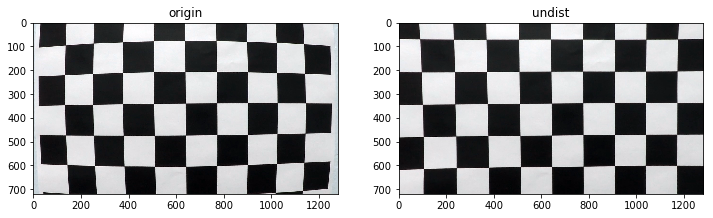

## 3. Color Transform

I used a combination of color and gradient thresholds to generate a binary image.  I binirize x_gradient image use range 20 to 100, and binirize s channel image use range 170 to 255.
Here's an example of my output for this step.
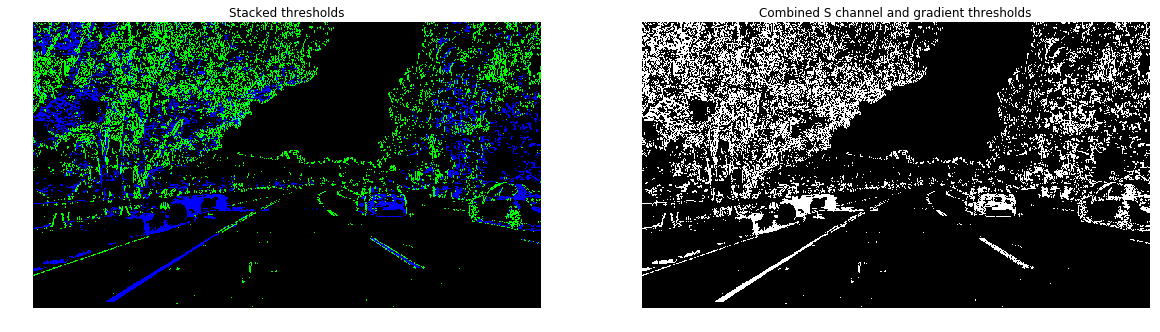

## 4. Perspective Transform

Now for this part I decided to transform before applying my thresholds on the image.This was done with the getPerspectiveTransform and warpPerspective funtions.

Transform Points

| Source         		|     Destination	        					| 
|:---------------------:|:---------------------------------------------:| 
| 253,697         		| 303,697   							| 
| 1061,690     	| 1011,697 	|
| 700,456					|	1011,0											|
| 585,456	      	| 303,0|

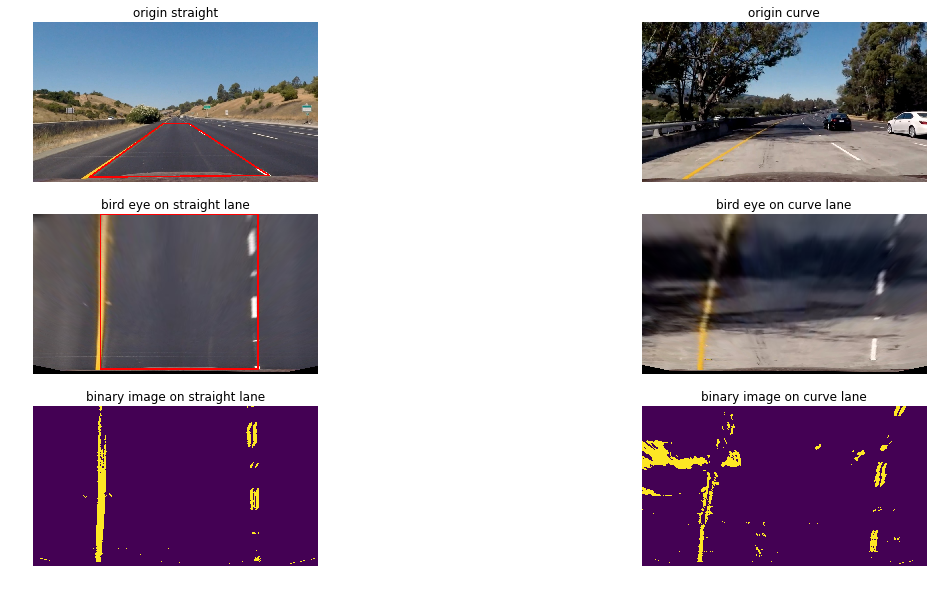

## 5. Detect Lane Lines and Determine Lane Curvature

Lane lines were found by sliding a histogram window from the bottom of the bit mask to the upper 3/4 range. At each slice a point was indexed for were the highest density of pixels were found.Using the points gathered from the lane detction a 2nd order polynomial was fit to the data. With the new polynomial fit, new points were generated to simulate the entire lenth of the line.
Lanes were imposed by taking the polynomial fit points and feeding them int opencv's poly fill to fill the polygon. From there the new polygon was then undistored, trucated, and imposed onto the rode as seen below.
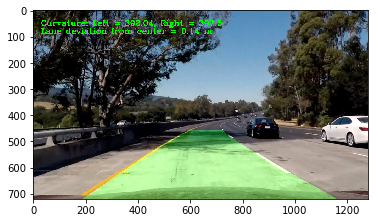

## 6. Pipeline for Video

Here's a link to my [video result](output_images/project_video_output.mp4)

## 7. Discussion

At first the lanes were all over the place and very jittery. I applied techniques to help such as make sure that the polygon that comes after was of similar shape, I also ruled out polygons that failed to meet area requirements. When there errors arrose the last correct polygon was written instead.
Future improvents to avoid the algoritm from failing is a much cleaner bit mask extraction. When tested on the most difficult video the main problem was addtional noise creating points that ruined the polynomial fit. With more time a better bit mask extraction can be applied to enhance this algorithm.